<a href="https://colab.research.google.com/github/manujsinghwal/uber-partner-business-modeling/blob/main/uber_partner_business_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uber Partner Business Modeling

### Data Exploration
Let's start with reading and exploring the dataset. First, import pandas and NumPy as always.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Mounting Google drive as dataset stored in a drive directory
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Reading .csv file from Google drive directory
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/Dataset/uber_partner.csv')
df.head()

,Name,Trips Completed,Accept Rate,Supply Hours,Rating
0,Abdul,1,100%,3,4.8
1,Abraham,12,83%,5,4.7
2,Adelina,1,100%,2,4.7
3,Akilah,1,100%,2,4.9
4,Alec,21,76%,11,5.0


It seems we have a dataset that includes taxi driver statistics. Let's check if there are any null values.

In [4]:
# Renaming columns
df.columns = [c.replace(' ', '') for c in df.columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            119 non-null    object 
 1   TripsCompleted  119 non-null    int64  
 2   AcceptRate      119 non-null    object 
 3   SupplyHours     119 non-null    int64  
 4   Rating          119 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ KB


Hence, no null values. But, we need to remove the `%` sign from `Accept Rate` column, needed for further data analysis.

In [6]:
df['AcceptRate'] = (
    df['AcceptRate']
    .str.replace('%','')
    .astype('float')
    )

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            119 non-null    object 
 1   TripsCompleted  119 non-null    int64  
 2   AcceptRate      119 non-null    float64
 3   SupplyHours     119 non-null    int64  
 4   Rating          119 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 4.8+ KB


In [7]:
df.head()

,Name,TripsCompleted,AcceptRate,SupplyHours,Rating
0,Abdul,1,100.0,3,4.8
1,Abraham,12,83.0,5,4.7
2,Adelina,1,100.0,2,4.7
3,Akilah,1,100.0,2,4.9
4,Alec,21,76.0,11,5.0


Now, we will have some bar plots to observe statistics distribution over taxi drivers. We will define a function to use multiple times in plotting.

In [24]:
# Setting up the figure size for further visualizations
plt.rcParams["figure.figsize"] = (10,6)

# Defining a function to annotating on the bars
def annotating_plot(ax):
  for c in ax.containers:
      # If the segment is small or 0, we can customize the labels
      labels = []
      for v in c:
          if v.get_height() > 1:
              labels.append(int(v.get_height()))
          else:
              labels.append('')
      ax.bar_label(c, labels=labels, label_type='center', fontsize=8)

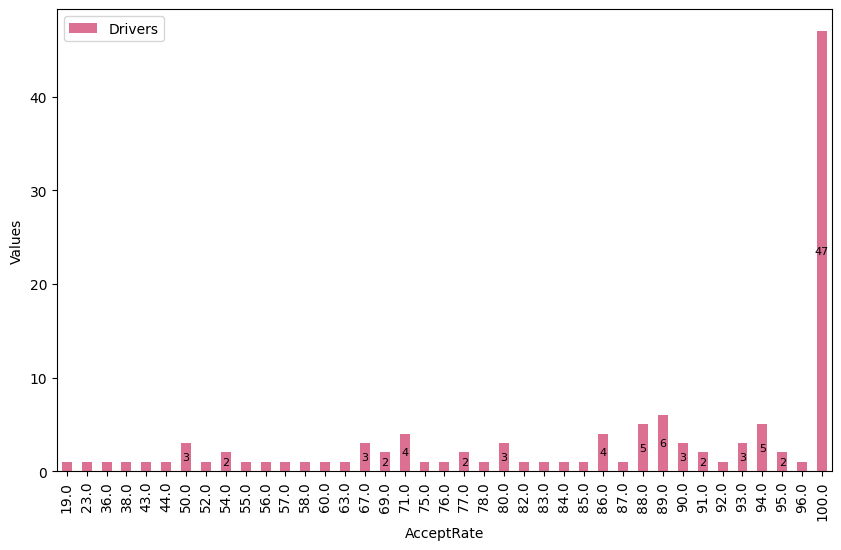

In [25]:
ax1 = (
      df[['Name', 'AcceptRate']]
      .rename(columns={'Name':'Drivers'})
      .groupby('AcceptRate')['Drivers']
      .count()
      .reset_index()
      .plot(kind='bar', x='AcceptRate', color='palevioletred')
    )

# Annotating on the bars
annotating_plot(ax1)

plt.ylabel("Values")
plt.show()

The majority of taxi drivers have an acceptance rate of over 95%. We will continue with ratings.

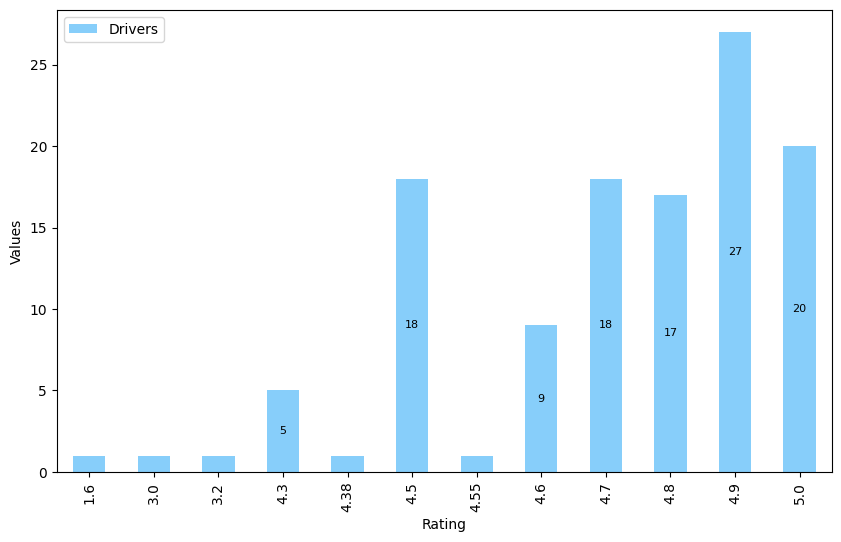

In [26]:
ax2 = (
      df[['Name', 'Rating']]
      .rename(columns={'Name':'Drivers'})
      .groupby('Rating')['Drivers']
      .count()
      .reset_index()
      .plot(kind='bar', x='Rating', color='lightskyblue')
    )

# Annotating on the bars
annotating_plot(ax2)

plt.ylabel("Values")
plt.show()

It seems that, there are just a few taxi drivers who have a rating lower than 4.5.

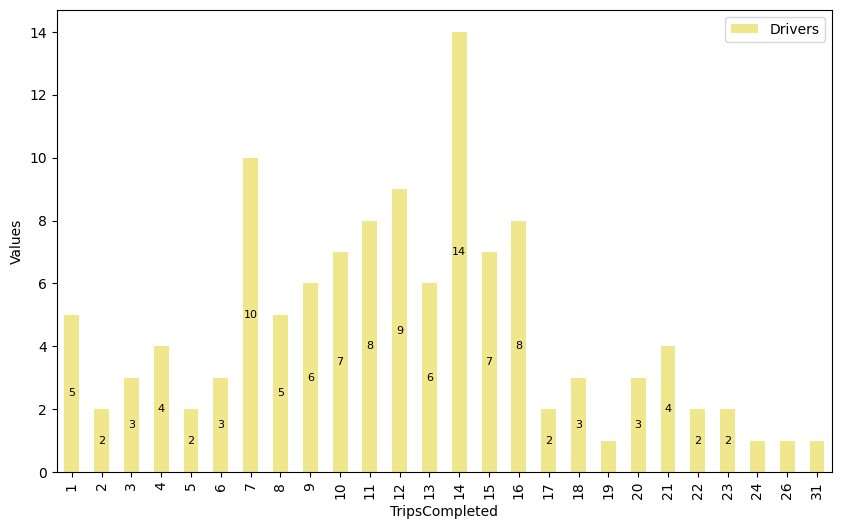

In [27]:
ax3 = (
      df[['Name', 'TripsCompleted']]
      .rename(columns={'Name':'Drivers'})
      .groupby('TripsCompleted')['Drivers']
      .count()
      .reset_index()
      .plot(kind='bar', x='TripsCompleted', color='khaki')
    )

# Annotating on the bars
annotating_plot(ax3)

plt.ylabel("Values")
plt.show()

There are less drivers who completed 17 or more trips.

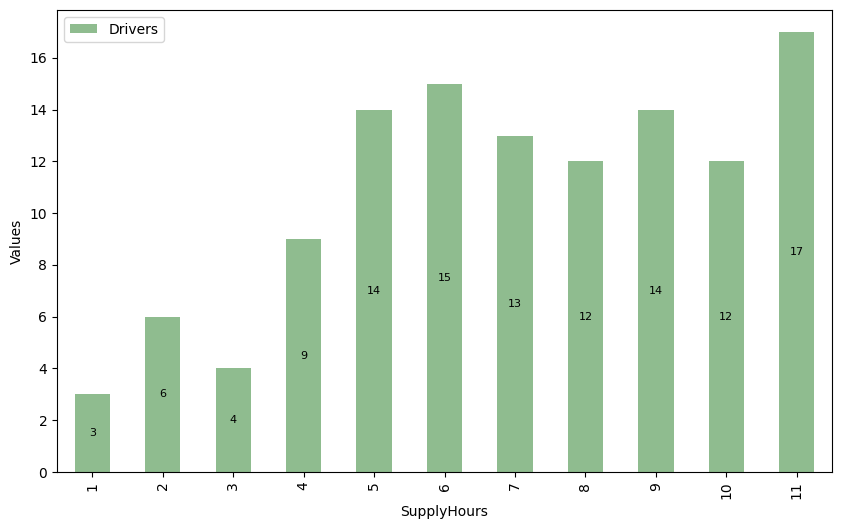

In [28]:
ax4 = (
      df[['Name', 'SupplyHours']]
      .rename(columns={'Name':'Drivers'})
      .groupby('SupplyHours')['Drivers']
      .count()
      .reset_index()
      .plot(kind='bar', x='SupplyHours', color='darkseagreen')
    )

# Annotating on the bars
annotating_plot(ax4)

plt.ylabel("Values")
plt.show()

Most taxi drivers work more than 5 hours. Now we can move forward with questions!

**Scenario 1:** It is going to be a huge Saturday and there will need to be many more cars on the road than last week. In order to get drivers to go online, we're assessing the following two bonus options in terms of cost:

**Option 1:** $50 for each driver that is online at least 8 hours, accepts 90% of requests, completes 10 trips, and has a rating of 4.7 or better during the time frame;

**Option 2:** $4/trip for all drivers who complete 12 trips, and have a 4.7 or better rating.
\
\
Given Scenario 1, provide answers to the questions below:

### Question 1
**How much would the total bonus payout be with Option 1?**
\
It is basic filtering! We will apply the conditions to DataFrame and see how many taxi drivers would fall under them and multiply the number of drivers by $50.

In [13]:
option1 = (
    df
    .copy()
    .query('SupplyHours >= 8 & AcceptRate >= 90.0 & TripsCompleted >= 10 & Rating >= 4.7')
)

option1_payout = '$' + str(option1.shape[0] * 50)
option1_payout

'$1050'

### Question 2
**How much would the total bonus payout be with Option 2?**
\
Similar to question 1, we will apply the conditions to DataFrame and see how many taxi drivers would fall under them and calculate the payout accordingly.

In [14]:
option2 = (
    df
    .copy()
    .query('TripsCompleted >= 12 & Rating >= 4.7')
)

option2_payout = '$' + str(option2['TripsCompleted'].sum() *  4)
option2_payout


'$2976'

### Question 3
**How many drivers would qualify under Option 1 but not under Option 2?**
\
To find out the drivers that qualify with option 1 but not with option 2, we can merge (left) both dataframes (option1 and option2) and use indicator for left dataframe.

In [15]:
df_merge = pd.merge(
    option1,
    option2,
    how='left',
    on=option1.columns.to_list(),
    indicator=True
)

drivers_with_option1 = (
    df_merge
    .query('_merge == "left_only"')
  )

drivers_with_option1

,Name,TripsCompleted,AcceptRate,SupplyHours,Rating,_merge
16,Oren,11,91.0,9,4.8,left_only
17,Phyllis,10,90.0,8,4.8,left_only


### Question 4
**What percentages of drivers online completed less than 10 trips, had an acceptance rate of less than 90%, and had a rating of 4.7 or higher?**

In [16]:
drivers_filtered = (
    df
    .copy()
    .query('TripsCompleted < 10 & AcceptRate < 90.0 & Rating >= 4.7')
)

drivers_percentage = str(round(drivers_filtered.shape[0] * 100.0 / df.shape[0], 2)) + '%'
drivers_percentage

'10.92%'

**Scenario 2:** A taxi driver currently generates $200 per day in fares (before expenses), works six days a week, takes three weeks off, and has the following expenses:

Gas - \$200 per week
\
Insurance - \$400 per month
\
Vehicle rent (by the week) - \$500
\
The driver doesn't pay gas and rent expenses on off weeks.
\
\
Given Scenario 2, provide answers to the questions below:

### Question 5
**How much money (after expenses) does the taxi driver make per year without partnering with Uber?**
\
Let's pull all the variables and calculate the profit margin.

In [17]:
total_weeks = 52
weeks_off = 3
fare_per_day = 200
workday_per_week = 6
total_months_per_year = 12

# Expenses
gas_per_week = 200
insurance_per_month = 400
vehicle_rent_by_week = 500

In [18]:
total_expenses = (gas_per_week + vehicle_rent_by_week) * (total_weeks - weeks_off) + insurance_per_month * total_months_per_year
print('$'+str(total_expenses))

$39100


In [19]:
total_revenue = (fare_per_day * workday_per_week) * (total_weeks - weeks_off)
print('$'+str(total_revenue))

$58800


Finally, deduct all expenses from the total revenue to calculate how much money the driver makes per year.

In [20]:
profit_margin = round((total_revenue - total_expenses) * 100.0 / total_revenue, 2)
print(str(profit_margin)+'%')

33.5%


Now, let's assume that the same driver would buy a Town Car and partner with Uber. If he does, his gas expenses would go up by 5%, his insurance expense would decrease by 20%, and he would no longer be renting a vehicle. However, he would need to buy a car. The driver would still take three weeks off per year.

### Question 6
**You are convincing the same driver above to buy a Town Car and partner with Uber. Assuming the new car is 40,000 USD, how much would the driver's gross fares need to increase per week to fully pay for the car in year 1 and maintain the same yearly profit margin as before?**
\
To solve the above problem, we can start by implementing new expenses.

In [21]:
# Calculating new expenses
gas_per_week = gas_per_week * 1.05
insurance_per_month = insurance_per_month * 0.8
new_car_cost = 40000

new_total_expenses = new_car_cost + gas_per_week * (total_weeks - weeks_off) + insurance_per_month * total_months_per_year
print('$'+str(new_total_expenses))

$54130.0


We can see that the new expenses are higher than the $39100 from the previous scenario. However, the value is still lower than the yearly revenue of this driver, i.e. \$58800. Let's find out what would be the yearly profit margin if the revenue stayed the same.

In [22]:
# Profit margin is the total revenue from previous question minus new expenses
new_profit_margin = round((total_revenue - new_total_expenses) * 100.0 / total_revenue, 2)
print(str(new_profit_margin) + '%')

7.94%


As expected, given the higher costs, the driver's income would be lower. So by how much would they need to increase their fares for the profit margin to remain at 33.5%? We can calulcate the weekly increase by fidning the difference between the two profit margins and dividing it by the number of weeks.

In [23]:
# Calculating the weekly fare increase
fare_increase = total_revenue * (profit_margin - new_profit_margin) / ((total_weeks - weeks_off) * 100.0)
print("$"+str(round(fare_increase, 2)))

$306.72
